In [38]:
import monai
import numpy as np
import torch
import os
import pandas as pd
import re
import pydicom
from pydicom.filereader import read_dicomdir
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
img_path = '/nvmescratch/ceib/Prostate/Bounding_Boxes'

In [4]:
data = []  # List to collect the data

for subject in os.listdir(os.path.join(img_path, 'p0052021')):
    for session in os.listdir(os.path.join(img_path, 'p0052021', subject)):
        for image in os.listdir(os.path.join(img_path, 'p0052021', subject, session)):
            if image == 'sr' or image.startswith('SEG'):
                continue
            img = os.path.join('p0052021', subject, session, image,'DICOM')
            data.append({
                'subject': subject,
                'session': session,
                'image': img,
            })

# Create DataFrame from collected data
df_images = pd.DataFrame(data, columns=['subject', 'session', 'image'])

In [5]:
df_images

subject session                              image
0     005586  006040     p0052021/005586/006040/9/DICOM
1     005586  006040     p0052021/005586/006040/8/DICOM
2     005586  006040     p0052021/005586/006040/7/DICOM
3     005586  006040     p0052021/005586/006040/6/DICOM
4     005586  006040     p0052021/005586/006040/5/DICOM
...      ...     ...                                ...
1290  005399  005819  p0052021/005399/005819/1101/DICOM
1291  005399  005819  p0052021/005399/005819/1005/DICOM
1292  005399  005819  p0052021/005399/005819/1004/DICOM
1293  005399  005819  p0052021/005399/005819/1003/DICOM
1294  005399  005819  p0052021/005399/005819/1001/DICOM

[1295 rows x 3 columns]

In [6]:
data = []  # List to collect the data

for subject in os.listdir(os.path.join(img_path, 'p0052021')):
    for session in os.listdir(os.path.join(img_path, 'p0052021', subject)):
        for image in os.listdir(os.path.join(img_path, 'p0052021', subject, session)):
            if image != 'sr':
                if image.startswith('SEG'):
                    bounding_box = os.path.join('p0052021', subject, session, image,'SEG')
                    image_associated = os.path.join('p0052021', subject, session,re.findall('\d+',image.split('_')[-1])[0],'DICOM')

                    data.append({
                        'subject': subject,
                        'session': session,
                        'image_associated': image_associated,
                        'bounding_box': bounding_box
                    })

# Create DataFrame from collected data
df_bounding_boxes = pd.DataFrame(data, columns=['subject', 'session', 'image_associated', 'bounding_box'])


In [7]:
df_images

subject session                              image
0     005586  006040     p0052021/005586/006040/9/DICOM
1     005586  006040     p0052021/005586/006040/8/DICOM
2     005586  006040     p0052021/005586/006040/7/DICOM
3     005586  006040     p0052021/005586/006040/6/DICOM
4     005586  006040     p0052021/005586/006040/5/DICOM
...      ...     ...                                ...
1290  005399  005819  p0052021/005399/005819/1101/DICOM
1291  005399  005819  p0052021/005399/005819/1005/DICOM
1292  005399  005819  p0052021/005399/005819/1004/DICOM
1293  005399  005819  p0052021/005399/005819/1003/DICOM
1294  005399  005819  p0052021/005399/005819/1001/DICOM

[1295 rows x 3 columns]

In [8]:
df_bounding_boxes

subject session                    image_associated  \
0    005586  006040      p0052021/005586/006040/8/DICOM   
1    005586  006040      p0052021/005586/006040/7/DICOM   
2    005596  006050  p0052021/005596/006050/13001/DICOM   
3    005700  006173      p0052021/005700/006173/9/DICOM   
4    005700  006173      p0052021/005700/006173/6/DICOM   
..      ...     ...                                 ...   
558  005646  006108   p0052021/005646/006108/1000/DICOM   
559  005646  006108      p0052021/005646/006108/4/DICOM   
560  005646  006108     p0052021/005646/006108/10/DICOM   
561  005399  005819    p0052021/005399/005819/701/DICOM   
562  005399  005819    p0052021/005399/005819/401/DICOM   

                                          bounding_box  
0    p0052021/005586/006040/SEG_20240113_205302_952...  
1    p0052021/005586/006040/SEG_20240113_205223_953...  
2    p0052021/005596/006050/SEG_20240113_211223_114...  
3    p0052021/005700/006173/SEG_20240113_211959_757...  
4    p0052021/005700/006173/SEG_20240113_211858_507...  
..                                                 ...  
558  p0052021/005646/006108/SEG_20240113_205854_334...  
559  p0052021/005646/006108/SEG_20240113_210039_451...  
560  p0052021/005646/006108/SEG_20240113_205809_919...  
561  p0052021/005399/005819/SEG_20240109_114231_571...  
562  p0052021/005399/005819/SEG_20240109_114054_657...  

[563 rows x 4 columns]

In [9]:
merged_df = df_images.merge(df_bounding_boxes, 
                            left_on=['subject', 'session', 'image'], 
                            right_on=['subject', 'session', 'image_associated'], 
                            how='left')

In [51]:
merged_df[~merged_df.image_associated.isna()]

subject session                               image  \
1     005586  006040      p0052021/005586/006040/8/DICOM   
2     005586  006040      p0052021/005586/006040/7/DICOM   
9     005596  006050  p0052021/005596/006050/13001/DICOM   
13    005700  006173      p0052021/005700/006173/9/DICOM   
15    005700  006173      p0052021/005700/006173/7/DICOM   
...      ...     ...                                 ...   
1310  005646  006108      p0052021/005646/006108/4/DICOM   
1311  005646  006108   p0052021/005646/006108/1050/DICOM   
1312  005646  006108   p0052021/005646/006108/1000/DICOM   
1314  005399  005819    p0052021/005399/005819/701/DICOM   
1317  005399  005819    p0052021/005399/005819/401/DICOM   

                        image_associated  \
1         p0052021/005586/006040/8/DICOM   
2         p0052021/005586/006040/7/DICOM   
9     p0052021/005596/006050/13001/DICOM   
13        p0052021/005700/006173/9/DICOM   
15        p0052021/005700/006173/7/DICOM   
...                                  ...   
1310      p0052021/005646/006108/4/DICOM   
1311   p0052021/005646/006108/1050/DICOM   
1312   p0052021/005646/006108/1000/DICOM   
1314    p0052021/005399/005819/701/DICOM   
1317    p0052021/005399/005819/401/DICOM   

                                           bounding_box  
1     p0052021/005586/006040/SEG_20240113_205302_952...  
2     p0052021/005586/006040/SEG_20240113_205223_953...  
9     p0052021/005596/006050/SEG_20240113_211223_114...  
13    p0052021/005700/006173/SEG_20240113_211959_757...  
15    p0052021/005700/006173/SEG_20240113_211927_274...  
...                                                 ...  
1310  p0052021/005646/006108/SEG_20240113_210039_451...  
1311  p0052021/005646/006108/SEG_20240113_205921_383...  
1312  p0052021/005646/006108/SEG_20240113_205854_334...  
1314  p0052021/005399/005819/SEG_20240109_114231_571...  
1317  p0052021/005399/005819/SEG_20240109_114054_657...  

[469 rows x 5 columns]

In [11]:
img = pydicom.dcmread(os.path.join(img_path,merged_df['image'][1],'1.2.826.0.1.3680043.10.474.299538.9142629-8-10-14chxom.dcm'))

In [12]:
img.SeriesDescription

'ax T2'

In [68]:
os.path.join(img_path,merged_df['bounding_box'][1312])

'/nvmescratch/ceib/Prostate/Bounding_Boxes/p0052021/005646/006108/SEG_20240113_205854_334_S1000/SEG'

In [69]:
img_bb = pydicom.dcmread(os.path.join(img_path,merged_df['bounding_box'][1312],'SEG_20240113_205854_334_S1000.dcm'))

In [70]:
img_bb

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 220
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Segmentation Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.191509779839358020714313995351038095605
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.25.80302813137786398554742050926734630921603366648225212145404
(0002, 0013) Implementation Version Name         SH: 'dcmjs-0.0'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Segmentation Storage
(0008, 0018) SOP Instance UID                    UI: 2.25.191509779839358020714313995351038095605
(0008, 0020) Study Date                          DA: '20171218'
(0008, 0021) Series Date        

In [71]:
seg = img_bb.pixel_array

In [72]:
img_bb.SegmentSequence

<Sequence, length 1>

In [251]:
np.unique(seg)

array([0, 1], dtype=uint8)

In [74]:
images = monai.transforms.LoadImaged(keys=['img','seg'],ensure_channel_first = True,image_only=False)({'img':os.path.join(img_path,merged_df['image'][9]),'seg':os.path.join(img_path,merged_df['bounding_box'][9])})
images = monai.transforms.ResampleToMatchd(keys = ['seg'], key_dst = 'img',mode='nearest',padding_mode='zeros')(images)

In [75]:
images

{'img': metatensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 1.,  ..., 0., 0., 0.],
           [0., 0., 1.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [1., 0., 1.,  ..., 0., 0., 0.],
           [0., 0., 1.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          ...,
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           .

In [76]:
images['img'].shape

torch.Size([1, 384, 384, 25])

In [77]:
images['seg'].unique()

metatensor([  0., 255.])

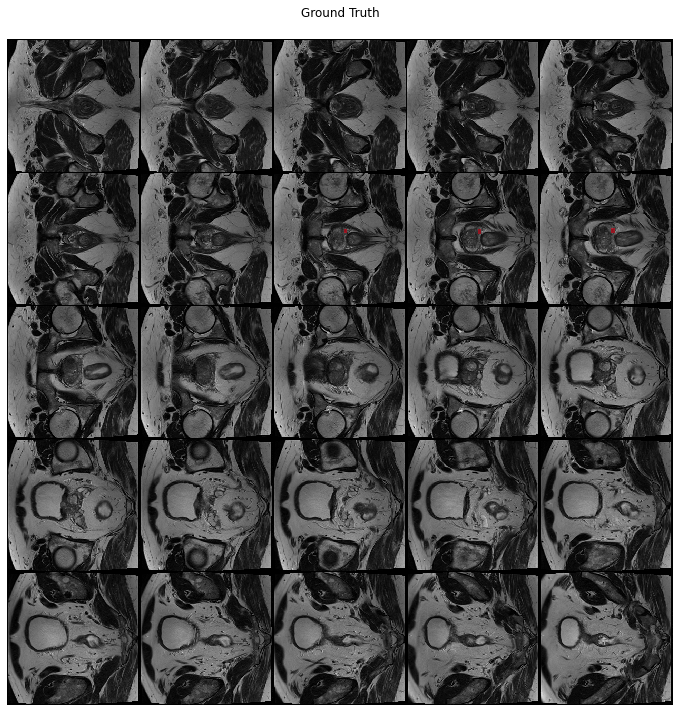

In [78]:
blended=monai.visualize.utils.blend_images(images['img'],images['seg'], alpha=0.5, cmap='hsv', rescale_arrays=True, transparent_background=True)

image=blended
monai.visualize.matshow3d(
    volume=image,
    fig=None, title="Ground Truth",
    figsize=(10, 10),
    every_n=1,
    frame_dim=-1,
    show=True,
    channel_dim=0
)
plt.show()

In [ ]:
monai.transforms.Transposed()

In [82]:
monai.transforms.utils.generate_spatial_bounding_box(channel_indices=0, img= images['seg'])

([160, 204, 7], [178, 216, 10])

## Test Center Crop

In [89]:
from monai.utils import first, set_determinism
from monai.transforms import (
    Compose,
    Spacingd,
    LoadImaged,
    EnsureChannelFirstd,
    Orientationd,
    ScaleIntensityd,
    NormalizeIntensityd,
    AsDiscreted,
    KeepLargestConnectedComponentd,
    Invertd,
)

from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.data import CacheDataset, DataLoader, Dataset, decollate_batch
import monai

import torch
import matplotlib.pyplot as plt

import os
from glob import glob
import numpy as np
import pandas as pd

from monai.inferers import sliding_window_inference

In [83]:
from monai.networks.nets import UNet

pin_memory = torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Working on device: {device}")


UNet_meatdata = dict(
    spatial_dims=3,
    in_channels=1,
    out_channels=3,
    channels=[16, 32, 64, 128, 256, 512],
    strides=[2, 2, 2, 2, 2],
    num_res_units=4,
    norm="batch",
    act="PReLU",
    dropout=0.15,
)

model = UNet(**UNet_meatdata).to(device)

model.load_state_dict(
    torch.load(
        "/home/jaalzate/Tartaglia/Prostate_Tartaglia/XNAT/monailabel/model/unet_prostatez.pt"
    )
)
model.eval()

Working on device: cuda


UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.15, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.15, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit2): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, t

In [88]:

test_transforms = Compose(
    [
        LoadImaged(keys=["image"], image_only=False),
        EnsureChannelFirstd(keys=["image"]),
        Spacingd(keys=["image"], pixdim=[0.5, 0.5, 0.5], mode=("bilinear")),
        Orientationd(keys=["image"], axcodes="PRS"),
        ScaleIntensityd(keys=["image"], minv=0.0, maxv=1.0),
        NormalizeIntensityd(
            keys=["image"], subtrahend=0.24564478577685958, divisor=0.16611860579803212
        ),
    ]
)


post_transforms_pred = Compose(
    [
        # EnsureTyped(keys=[CommonKeys.PRED, CommonKeys.LABEL]),
        # Activationsd(keys="pred", sigmoid=True),
        # monai.transforms.DataStatsd(keys=["pred"]),
        Invertd(
            keys="pred",  # invert the `pred` data field, also support multiple fields
            transform=test_transforms,
            orig_keys="image",  # get the previously applied pre_transforms information on the `img` data field,
            # then invert `pred` based on this information. we can use same info
            # for multiple fields, also support different orig_keys for different fields
            nearest_interp=False,  # don't change the interpolation mode to "nearest" when inverting transforms
            # to ensure a smooth output, then execute `AsDiscreted` transform
            # orig_meta_keys="image_meta_dict",
            to_tensor=True,  # convert to PyTorch Tensor after inverting
        ),
        AsDiscreted(
            keys="pred",
            argmax=True,
            # to_onehot=3,
            dim=0,
        ),
        KeepLargestConnectedComponentd(keys=["pred"], applied_labels=list(range(1, 3))),
        # monai.transforms.LabelToMaskd(keys=["pred"],select_labels=[1,2]),
        # monai.transforms.FillHolesd(keys=["pred"], applied_labels=list(range(1, 3)), connectivity=1, allow_missing_keys=False),
        # monai.transforms.ToNumpyd(keys="pred"),
        # Orientationd(keys="pred", axcodes="ALS")
        # monai.transforms.SaveImaged(
        #     keys="pred",
        #     output_dir="/nvmescratch/ceib/Prostate/input/labels/anatomical_delineations/prostate_zones/picai_cropped",
        #     output_postfix="zones",
        #     meta_keys="image_meta_dict",
        #     resample=False,
        #     separate_folder=False,
        #     print_log=False,
        # ),
    ]
)

post_transforms_label = Compose(
    [
        # EnsureTyped(keys=[CommonKeys.PRED, CommonKeys.LABEL]),
        # Activationsd(keys="pred", sigmoid=True),
        Invertd(
            keys=[
                "image"
            ],  # invert the `pred` data field, also support multiple fields
            transform=test_transforms,
            # orig_keys="image",  # get the previously applied pre_transforms information on the `img` data field,
            # then invert `pred` based on this information. we can use same info
            # for multiple fields, also support different orig_keys for different fields
            nearest_interp=False,  # don't change the interpolation mode to "nearest" when inverting transforms
            # to ensure a smooth output, then execute `AsDiscreted` transform
            # orig_meta_keys="image_meta_dict",
            to_tensor=True,  # convert to PyTorch Tensor after inverting
        ),
        # Orientationd(keys=["image", "label"], axcodes="PRS")
        # SaveImaged(keys="pred", output_dir="./out", output_postfix="seg", resample=False),
    ]
)

In [90]:
files = [{"image": t2} for t2 in [os.path.join(img_path,merged_df['image'][9])]]
# files=files[270::]
ds = Dataset(data=files, transform=test_transforms)
loader = DataLoader(ds, batch_size=1)

In [91]:
image = first(loader)
image["image"].shape

torch.Size([1, 1, 420, 420, 170])

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your 3D image is stored in the variable 'image'
hist, bins = np.histogram(image['image'].flatten(), bins=256, range=[0, 256])

plt.figure()
plt.hist(image['image'].flatten(), bins=256, range=[0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of 3D Image')
plt.show()


: 

In [92]:
image

{'image': metatensor([[[[[-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787],
            [-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787],
            [-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787],
            ...,
            [-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787],
            [-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787],
            [-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787]],
 
           [[-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787],
            [-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787],
            [-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787],
            ...,
            [-1.4732, -1.4740, -1.4748,  ..., -1.4787, -1.4787, -1.4787],
            [-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787],
            [-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4787, -1.4787]],
 
           [[-1.4787, -1.4787, -1.4787,  ..., -1.4787, -1.4

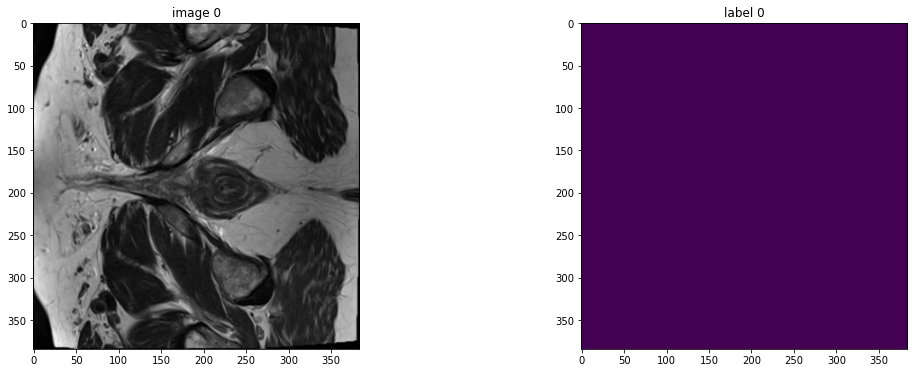

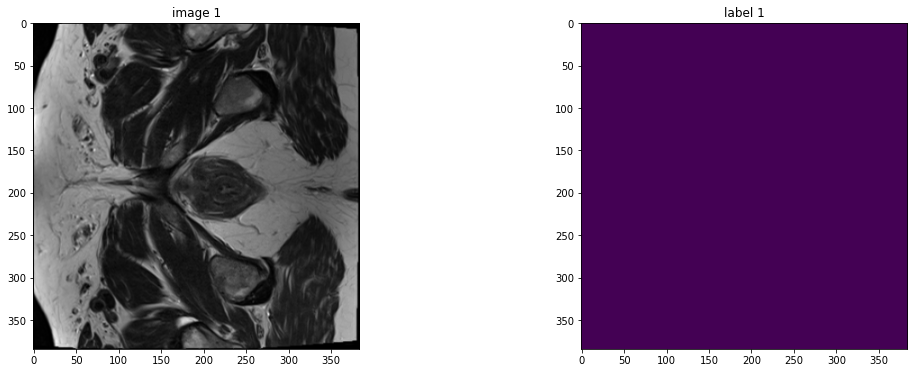

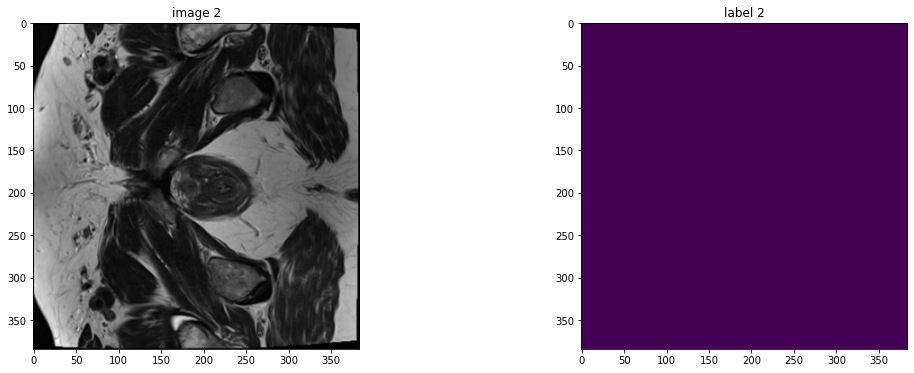

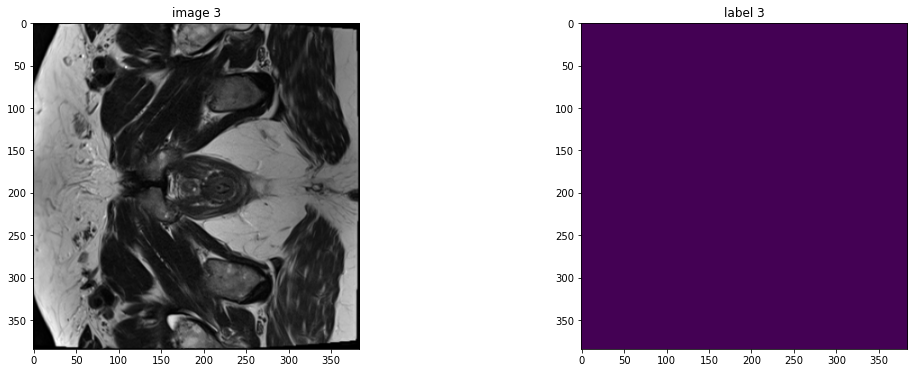

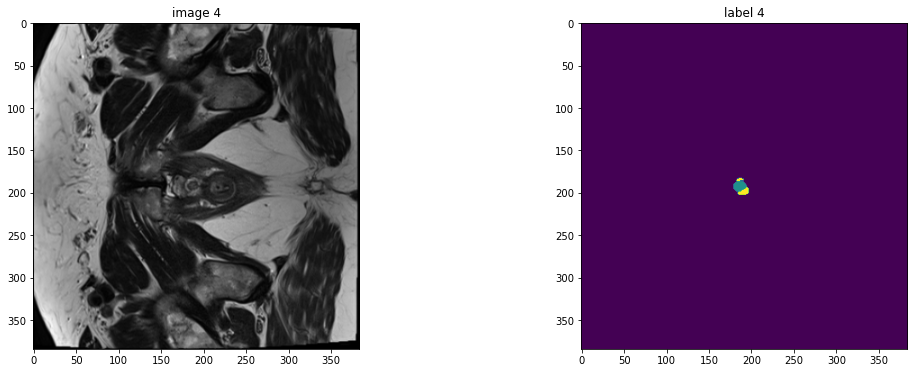

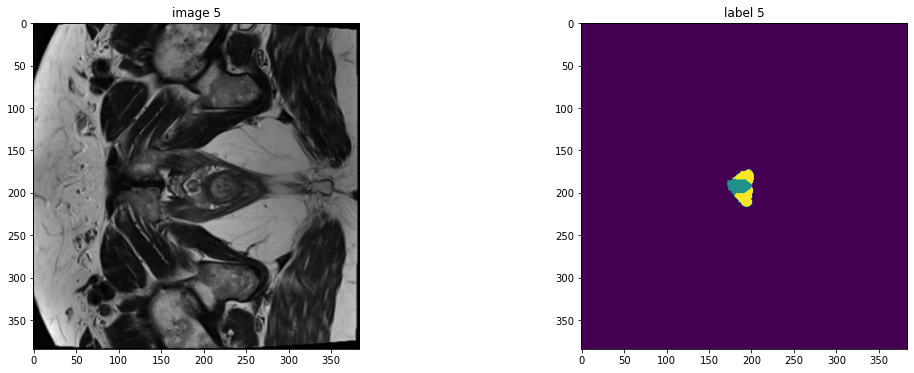

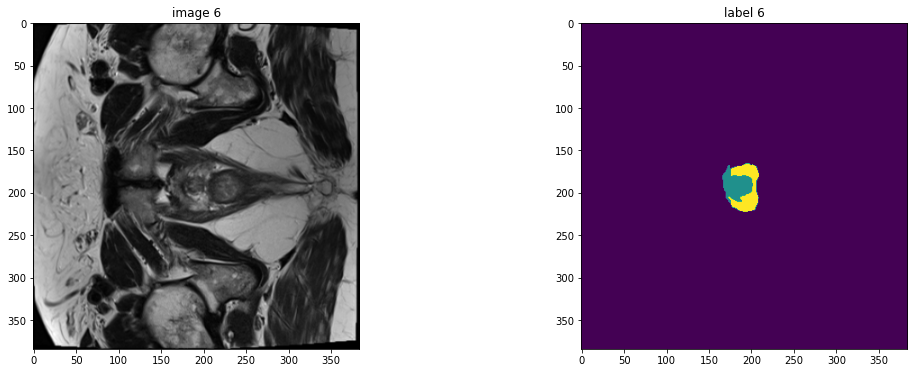

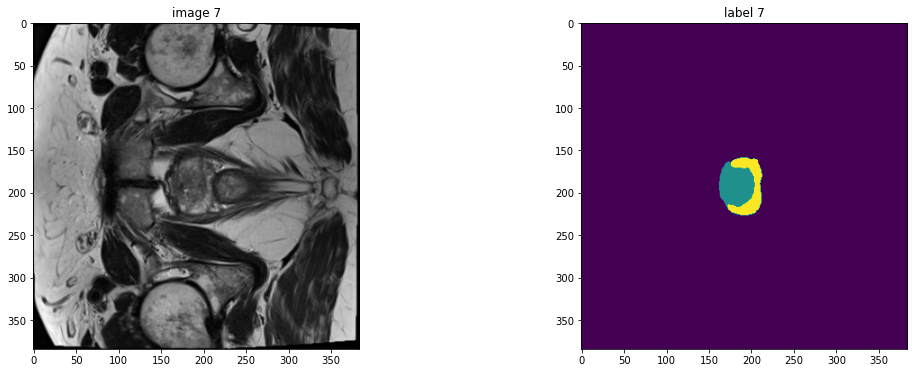

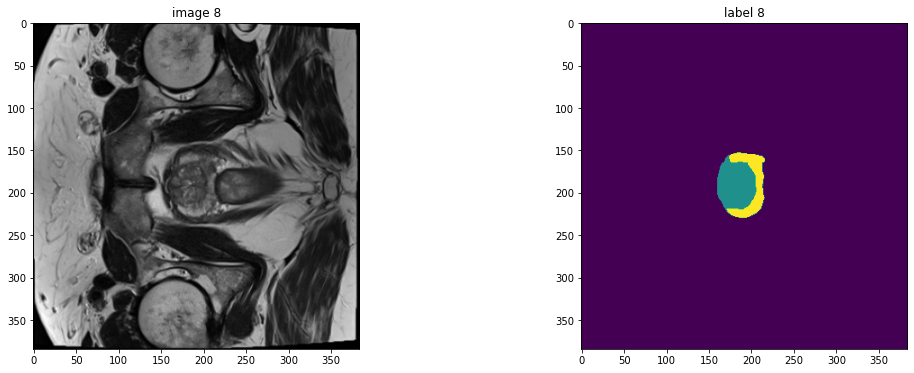

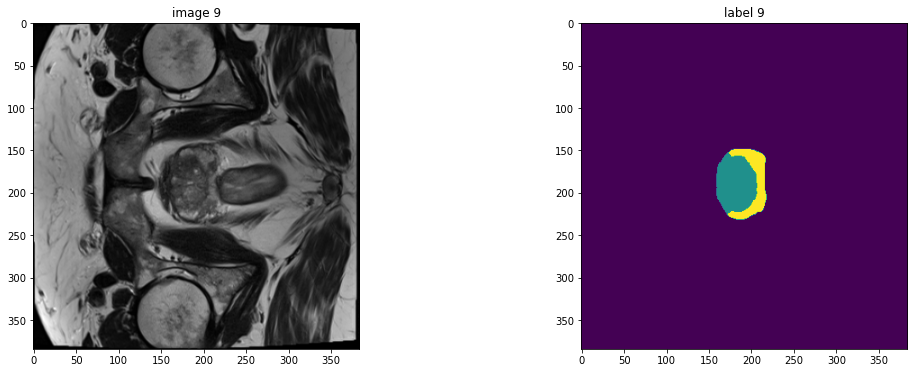

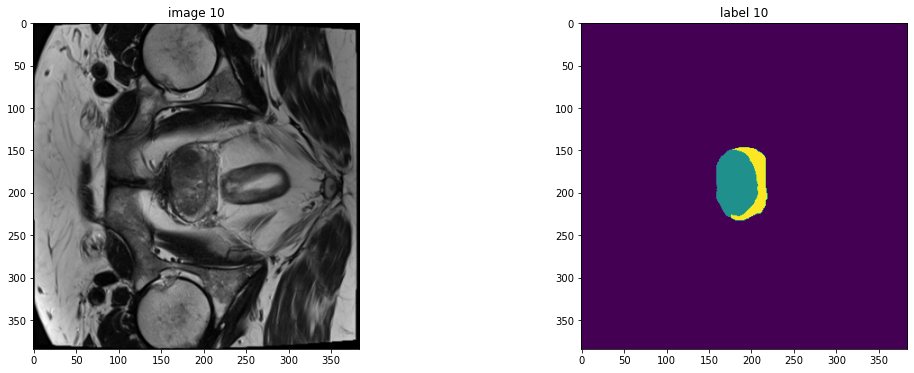

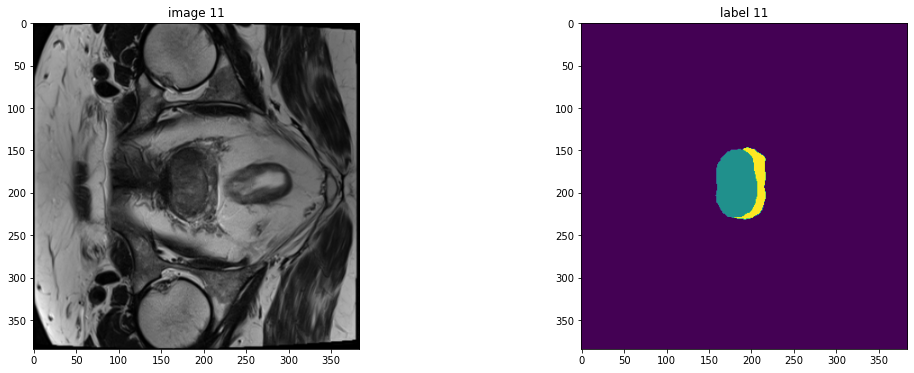

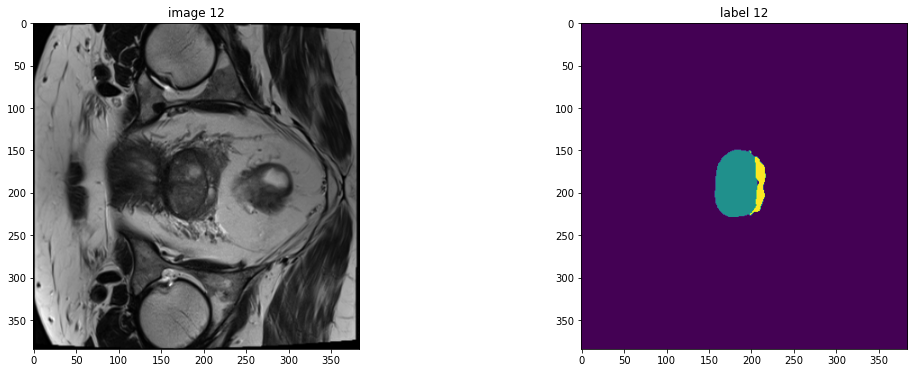

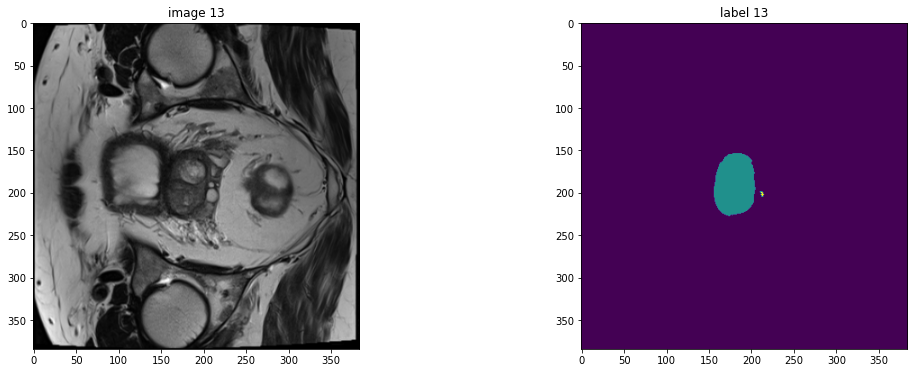

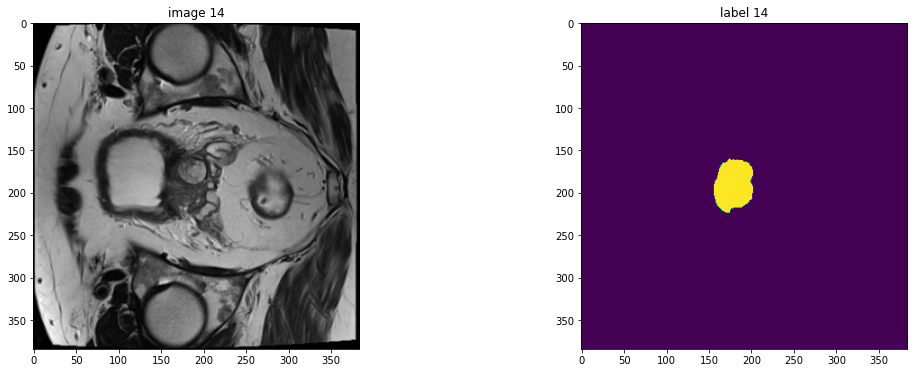

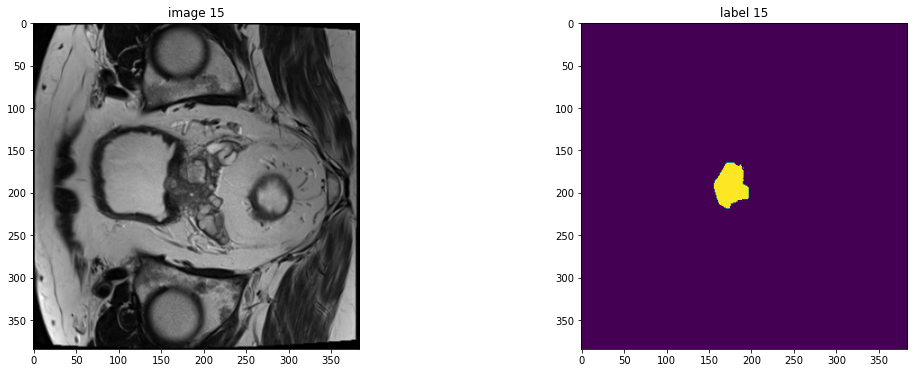

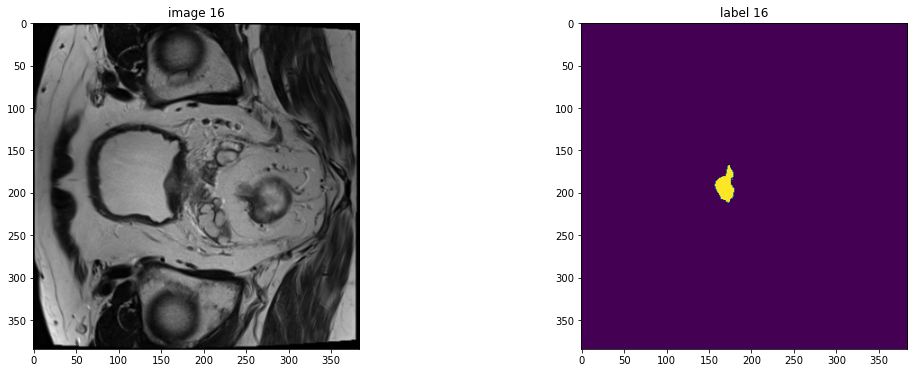

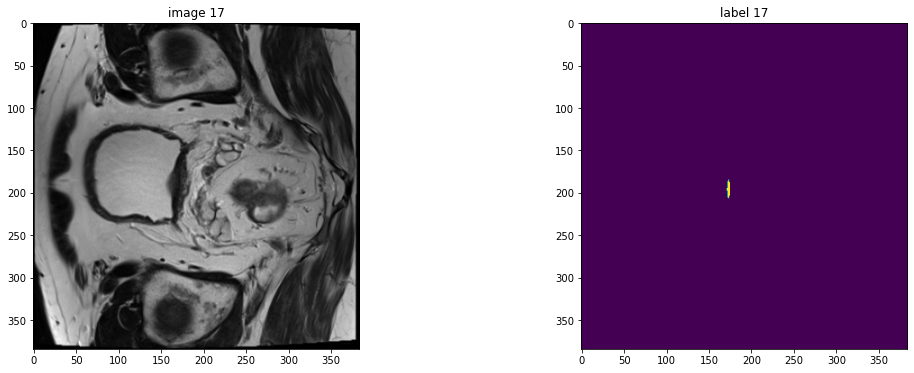

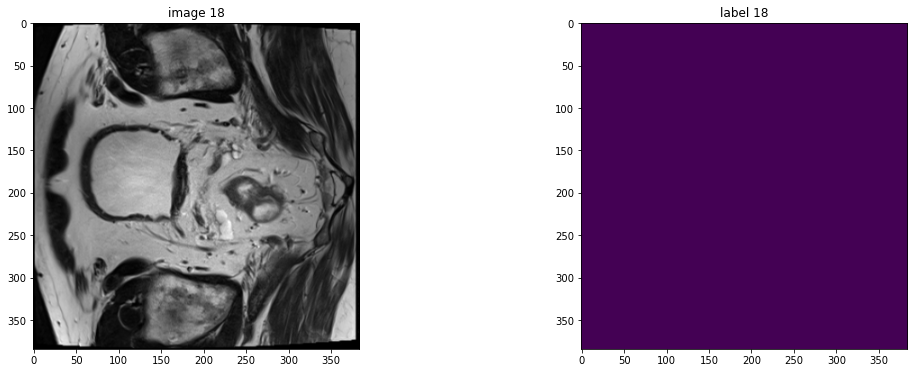

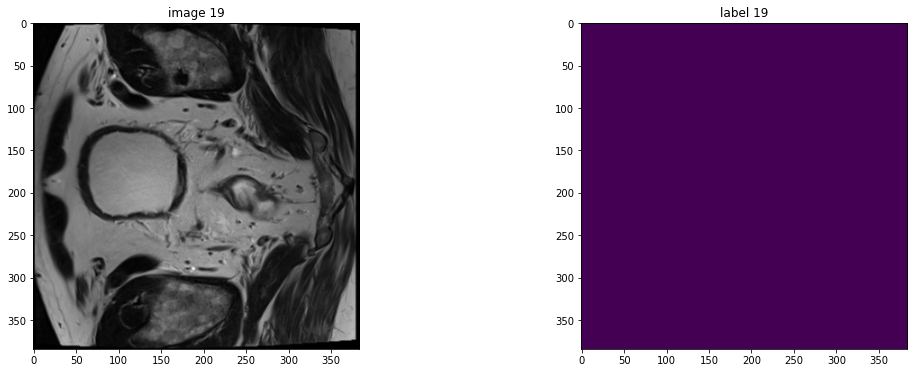

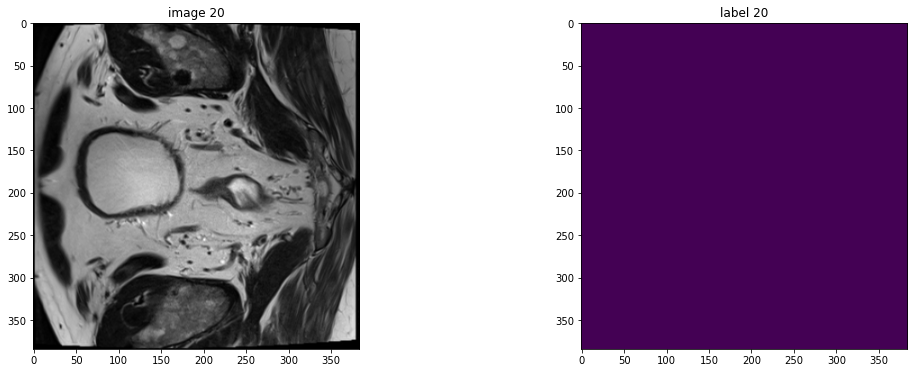

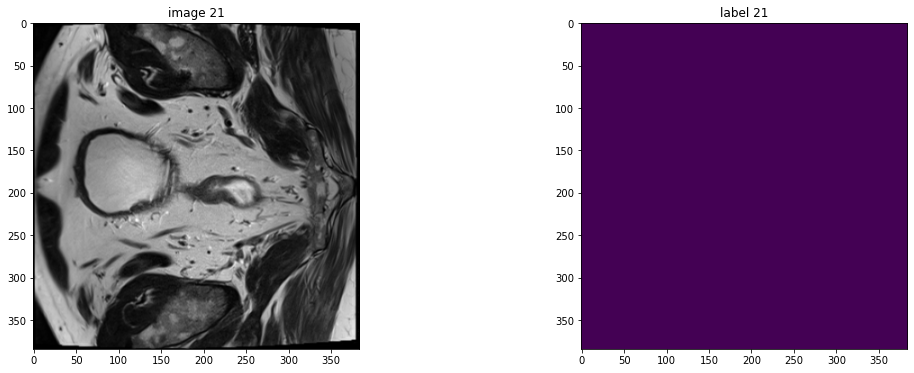

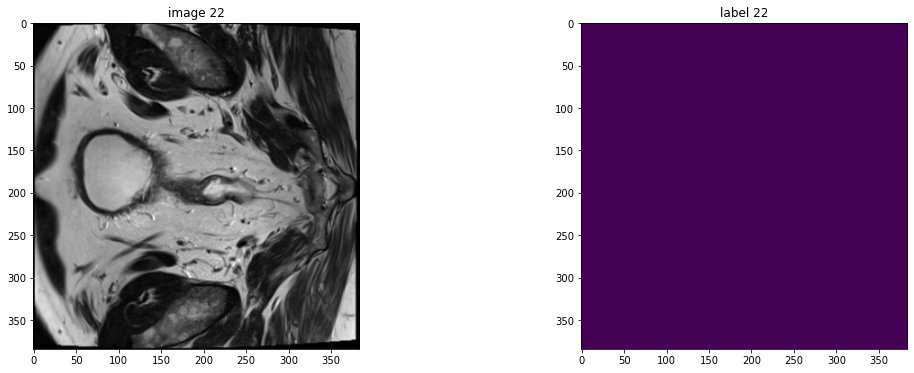

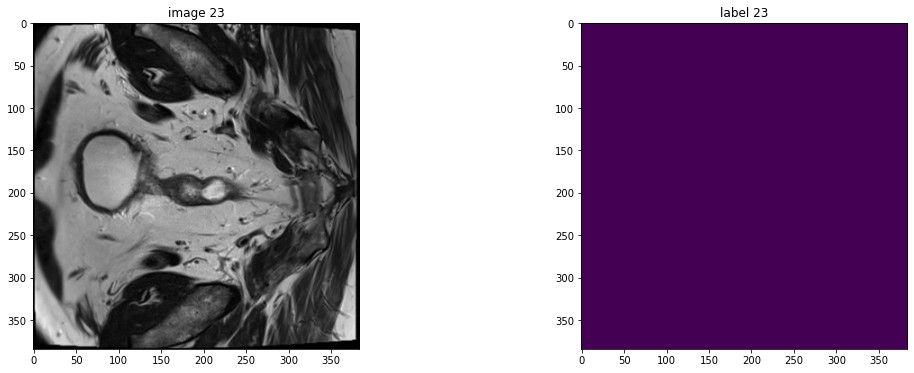

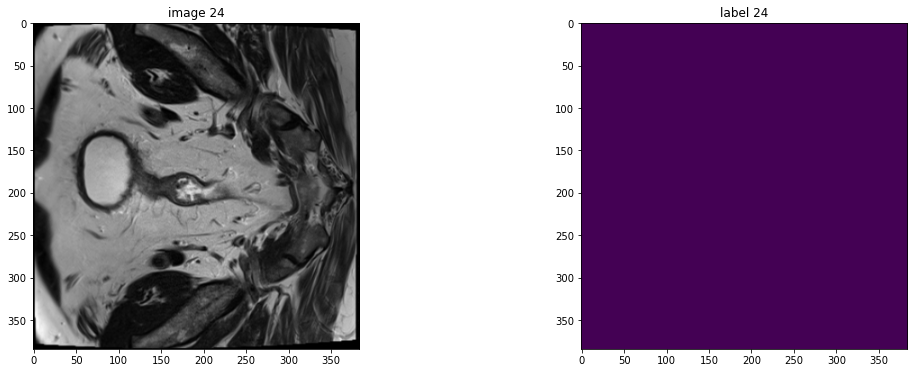

In [93]:
with torch.no_grad():
    test_volume = image["image"]

    test_volume = test_volume.to(device)

    # test_outputs = model(test_volume)
    image["pred"] = sliding_window_inference(
        test_volume, (96, 96, 96), 1, model, overlap=0.5
    )
    # test_outputs = test_outputs > 0.5
    # test_outputs=torch.argmax(test_outputs,dim=1)
    test_outputs = post_transforms_pred(decollate_batch(image))[0]
    test_outputs = post_transforms_label(test_outputs)

    for i in range(test_outputs["image"].shape[-1]):
        # plot the slice [:, :, 80]
        plt.figure("check", (18, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"image {i}")
        plt.imshow(test_outputs["image"][0, :, :, i], cmap="gray")
        plt.subplot(1, 2, 2)
        plt.title(f"label {i}")
        plt.imshow(test_outputs["pred"][0, :, :, i].cpu())
        plt.show()